Importación de Librerías


In [ ]:
import numpy as np
import pandas as pd #data procesing
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os

import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans



import warnings
warnings.filterwarnings('ignore')

Cargar el dataset

In [ ]:
from google.colab import drive
import numpy as np


drive.mount('/content/drive')

csv_path = '/content/drive/My Drive/ProjectAirline/Airline_Dataset_Updated.csv'
df = pd.read_csv(csv_path, sep=',')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Primer Avance

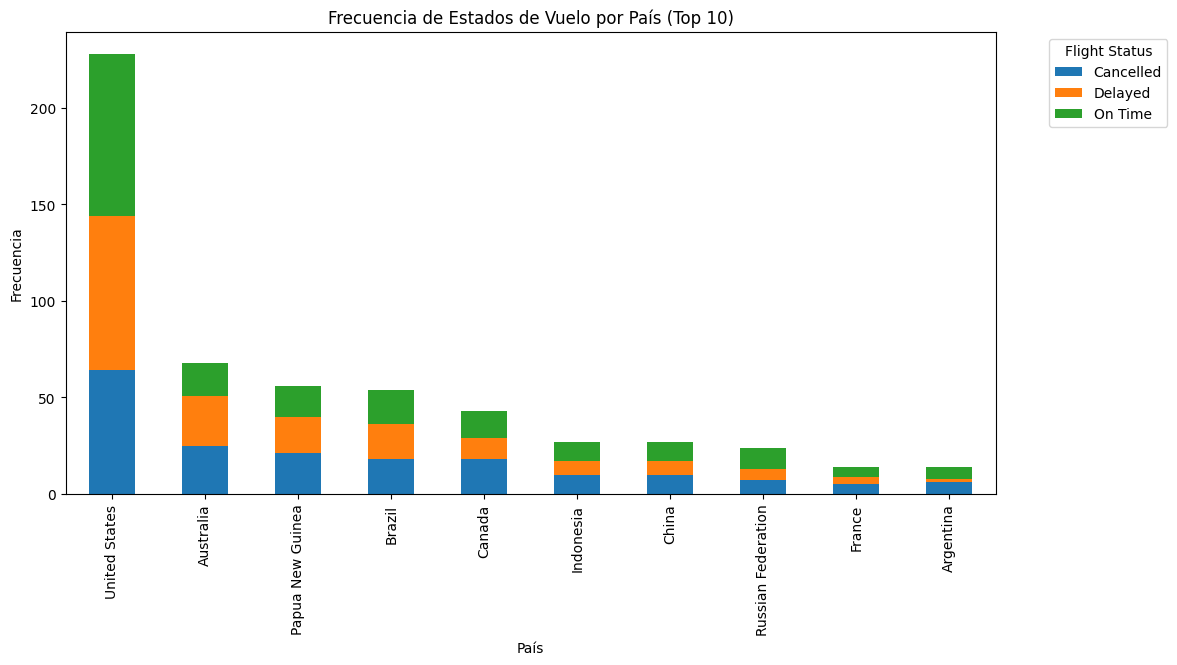

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Tomar una muestra aleatoria del 10% de los datos
sample_df = df.sample(frac=0.01, random_state=42)

# Filtrar las columnas relevantes
data = sample_df[['Country Name', 'Flight Status']]

# Filtrar solo las categorías de interés
categories_of_interest = ['On Time', 'Delayed', 'Cancelled']
data = data[data['Flight Status'].isin(categories_of_interest)]

# Contar la frecuencia de cada categoría para cada país
result = data.groupby(['Country Name', 'Flight Status']).size().unstack()

# Calcular la frecuencia total de estados de vuelo por país
result['Total'] = result.sum(axis=1)

# Ordenar por la frecuencia total y seleccionar los primeros 10
result = result.sort_values(by='Total', ascending=False).head(10)

# Eliminar la columna Total para la visualización
result.drop('Total', axis=1, inplace=True)

# Graficar los resultados
result.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Frecuencia de Estados de Vuelo por País (Top 10)')
plt.xlabel('País')
plt.ylabel('Frecuencia')
plt.legend(title='Flight Status', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


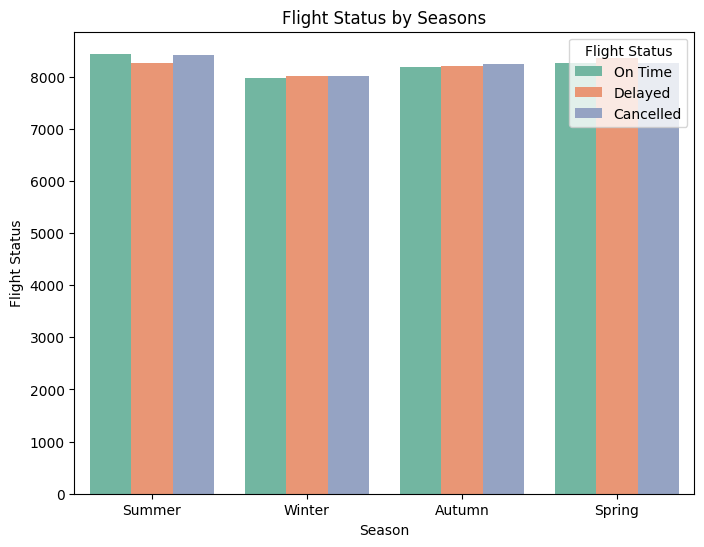

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating Seasons
def find_season(month):
    if 3 <= month <= 5:
        return "Spring"
    elif 6 <= month <= 8:
        return "Summer"
    elif 9 <= month <= 11:
        return "Autumn"
    else:
        return "Winter"

df['Departure_Season'] = df['Month'].apply(find_season)

# Create a countplot to visualize flight statuses by seasons
plt.figure(figsize=(8, 6))
sns.countplot(x="Departure_Season", hue="Flight Status", data=df, palette="Set2")
plt.title("Flight Status by Seasons")
plt.xlabel("Season")
plt.ylabel("Flight Status")
plt.legend(title="Flight Status", loc='upper right')
plt.show()

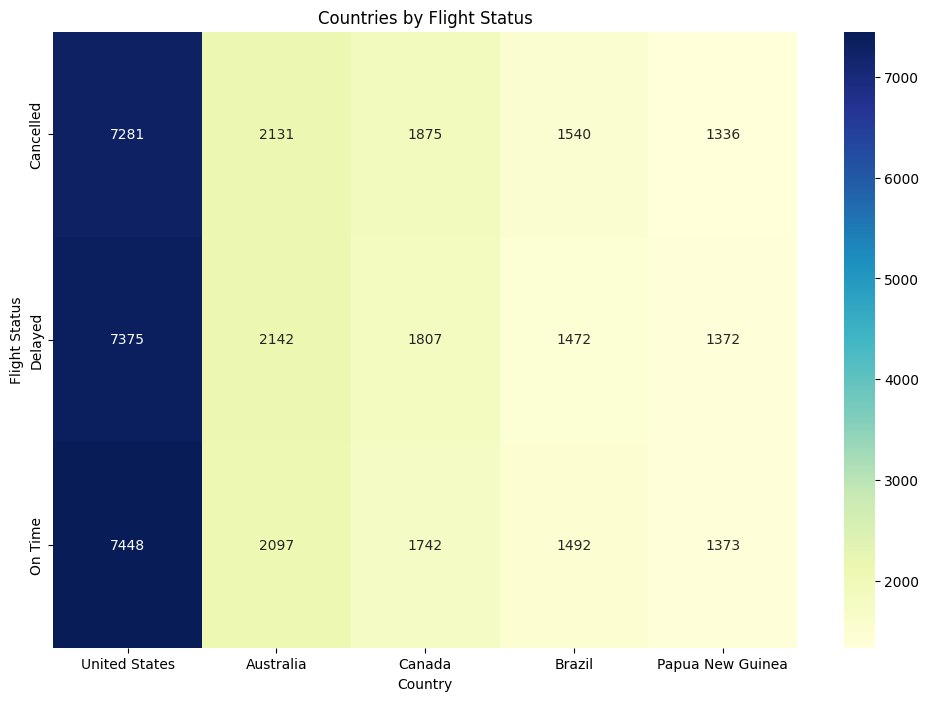

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group the data by 'Flight Status' and 'Country_Name' and calculate the counts
grouped_data = df.groupby(['Flight Status', 'Country Name']).size().unstack()

# Calculate country preferences and sort them
country_preferences = grouped_data.sum(axis=0).sort_values(ascending=False).head(5)

# Select only the top 20 preferred countries
top_20_countries = grouped_data[country_preferences.index]

# Visualize the data with a heatmap
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(top_20_countries, cmap="YlGnBu", annot=True, fmt=".0f")

# Customize the chart
plt.title('Countries by Flight Status')
plt.xlabel('Country')
plt.ylabel('Flight Status')


# Show the chart
plt.show()


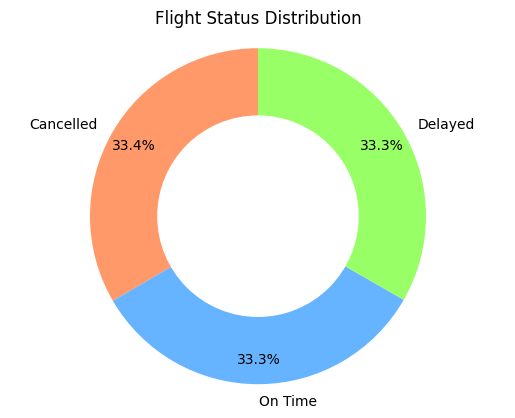

In [ ]:
#obtain categorical data
flight_statuses = ['Cancelled', 'On Time', 'Delayed']
count = [32942, 32846,32831]

#define a custom color palette
colors = ['#ff9969', '#66b3ff', '#99ff66']

#create a donut plot
fig, ax = plt.subplots()

#create a pie chart with a white circle in the middle to make it a donut plot
wedges, texts, autotexts = ax.pie(count, labels=flight_statuses, autopct='%1.1f%%', startangle=90,
                                  pctdistance=0.85, colors=colors)

#draw a white circle at the center
center_circle = plt.Circle((0, 0), 0.60, fc='white')
fig.gca().add_artist(center_circle)

#equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

plt.title("Flight Status Distribution");

#Segundo Avance

In [ ]:
Flight_status_df = df[['Country Name','Flight Status']]
Flight_status_df['FTE'] = 1

# Creating a Pivot table by Country with Count of Travellers per Flight Status
Flight_status_pivot = pd.pivot_table(Flight_status_df, index=['Country Name'],
                                     columns=['Flight Status'],
                                     values = ['FTE'], aggfunc='count')
Flight_status_pivot = Flight_status_pivot.reset_index()
Flight_status_pivot.head(10)


# Feature Engineering: Extract day of the week, month from Departure Date
df['Departure Date'] = pd.to_datetime(df['Departure Date'])
df['Day_of_Week'] = df['Departure Date'].dt.dayofweek
df['Month'] = df['Departure Date'].dt.month


# preparing the features

features = ['Airport Name', 'Airport Country Code', 'Country Name', 'Airport Continent',
            'Day_of_Week', 'Month','Pilot Name']
X = df[features].copy()

# Label Encoding for categorical features
label_encoders = {}
for feature in ['Airport Name', 'Airport Country Code', 'Country Name',
                'Airport Continent', 'Pilot Name']:
    le = LabelEncoder()
    X.loc[:, feature] = le.fit_transform(X[feature])  # Use .loc to avoid SettingWithCopyWarning
    label_encoders[feature] = le

# scaling the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# handling the Target variable
y = df['Flight Status'].copy().apply(lambda x: 1 if x == 'Delayed' else 0)

# Split the data into features and target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

classifiers = {
    'DecisionTreeCLassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),

}

for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f'{name}:\nAccuracy = {accuracy:.2f}\n')
    print(report)
    print('=' * 80)






DecisionTreeCLassifier:
Accuracy = 0.55

              precision    recall  f1-score   support

           0       0.66      0.64      0.65     13069
           1       0.34      0.35      0.34      6655

    accuracy                           0.55     19724
   macro avg       0.50      0.50      0.50     19724
weighted avg       0.55      0.55      0.55     19724

RandomForestClassifier:
Accuracy = 0.62

              precision    recall  f1-score   support

           0       0.66      0.89      0.76     13069
           1       0.33      0.11      0.16      6655

    accuracy                           0.62     19724
   macro avg       0.50      0.50      0.46     19724
weighted avg       0.55      0.62      0.56     19724



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


Flight_status_df = df[['Country Name', 'Flight Status']]
Flight_status_df['FTE'] = 1

# Creating a Pivot table by Country with Count of Travellers per Flight Status
Flight_status_pivot = pd.pivot_table(Flight_status_df, index=['Country Name'],
                                     columns=['Flight Status'],
                                     values=['FTE'], aggfunc='count')
Flight_status_pivot = Flight_status_pivot.reset_index()
Flight_status_pivot.head(10)

# Feature Engineering: Extract day of the week, month from Departure Date
df['Departure Date'] = pd.to_datetime(df['Departure Date'])
df['Day_of_Week'] = df['Departure Date'].dt.dayofweek
df['Month'] = df['Departure Date'].dt.month

# Preparing the features
features = ['Airport Name', 'Airport Country Code', 'Country Name', 'Airport Continent',
            'Day_of_Week', 'Month', 'Pilot Name']
X = df[features].copy()

# Label Encoding for categorical features
label_encoders = {}
for feature in ['Airport Name', 'Airport Country Code', 'Country Name',
                'Airport Continent', 'Pilot Name']:
    le = LabelEncoder()
    X.loc[:, feature] = le.fit_transform(X[feature])  # Use .loc to avoid SettingWithCopyWarning
    label_encoders[feature] = le

# Scaling the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Handling the Target variable
y = df['Flight Status'].copy().apply(lambda x: 1 if x == 'Delayed' else 0)

# Split the data into features and target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

# Support Vector Machine (SVM) model
svm_model = SVC(kernel='poly', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)

print(f'Support Vector Machine (SVM):\nAccuracy = {accuracy_svm:.2f}\n')
print(report_svm)
print('=' * 80)


Support Vector Machine (SVM):
Accuracy = 0.66

              precision    recall  f1-score   support

           0       0.66      1.00      0.80     13069
           1       0.00      0.00      0.00      6655

    accuracy                           0.66     19724
   macro avg       0.33      0.50      0.40     19724
weighted avg       0.44      0.66      0.53     19724



#Tercer Avance

Etiquetas de clustering de K-means:
[2 0 0 ... 1 4 4]


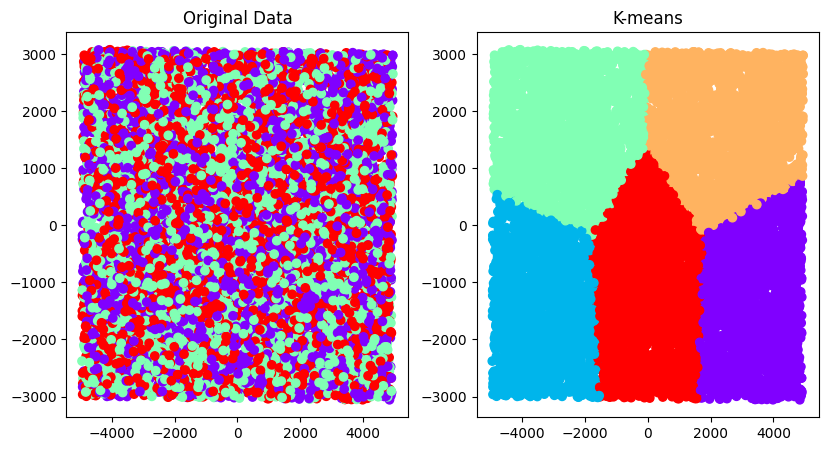

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

# Muestra aleatoria del 10% de los datos
sample_df = df.sample(frac=0.1, random_state=42)

# Convertir las columnas categóricas a numéricas
label_encoders = {}
categorical_columns = ['Airport Name', 'Airport Country Code', 'Country Name', 'Airport Continent', 'Pilot Name', 'Flight Status']
for col in categorical_columns:
    le = LabelEncoder()
    sample_df[col] = le.fit_transform(sample_df[col])
    label_encoders[col] = le

# Seleccionar características y variable objetivo
features = ['Airport Name', 'Airport Country Code', 'Country Name', 'Airport Continent', 'Pilot Name']
X = sample_df[features].copy()
y = sample_df['Flight Status']

# Reducción de dimensionalidad con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Modelo de clustering K-means
kmeans = KMeans(n_clusters=5)
kmeans_labels = kmeans.fit_predict(X_pca)

# Visualización de K-means
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='rainbow')
plt.title('Original Data')

plt.subplot(132)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='rainbow')
plt.title('K-means')

# Valores numéricos de las etiquetas de los clusters
print("Etiquetas de clustering de K-means:")
print(kmeans_labels)


Etiquetas de clasificación de Random Forest:
[0 0 2 ... 2 1 0]
Valores numéricos de las características:
[[ 1.71584651 -1.5109581  -1.53051256  1.68131881 -0.83898158]
 [-0.93692843 -0.36433708 -0.37021986 -1.01294472  0.91805671]
 [-1.05320705  0.44417773  0.26794112  1.00775293  0.6284968 ]
 ...
 [ 1.63562328 -1.01114894 -1.06639548 -1.01294472 -0.39269385]
 [ 0.64049466  1.20859174  1.19617528  0.33418705  1.22518701]
 [-0.28252319  1.20859174  1.19617528  0.33418705  0.3621298 ]]


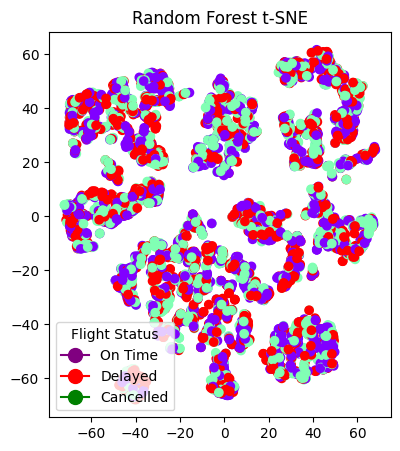

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

# Reducir la muestra al 5% para obtener menos puntos
sample_df = resample(df, replace=False, n_samples=int(0.05 * len(df)), random_state=42)

# Convertir las columnas categóricas a numéricas
label_encoders = {}
categorical_columns = ['Airport Name', 'Airport Country Code', 'Country Name', 'Airport Continent', 'Pilot Name', 'Flight Status']
for col in categorical_columns:
    le = LabelEncoder()
    sample_df[col] = le.fit_transform(sample_df[col])
    label_encoders[col] = le

# Seleccionar características y variable objetivo
features = ['Airport Name', 'Airport Country Code', 'Country Name', 'Airport Continent', 'Pilot Name']
X = sample_df[features].copy()

# Normalización de características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

y = sample_df['Flight Status']

# Reducción de dimensionalidad con t-SNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_scaled)

# Modelo de clasificación Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_tsne, y)  # Entrenar el modelo
rf_labels = rf.predict(X_tsne)  # Predecir las etiquetas

# Visualización de Random Forest t-SNE
plt.figure(figsize=(15, 5))

plt.subplot(132)
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=rf_labels, cmap='rainbow')
plt.title('Random Forest t-SNE')

# Valores numéricos de las etiquetas de clasificación
print("Etiquetas de clasificación de Random Forest:")
print(rf_labels)

# Mostrar leyenda con las categorías y colores
legend_labels = ['On Time', 'Delayed', 'Cancelled']
unique_colors = ['purple', 'red', 'green']
handles = [plt.Line2D([0], [0], marker='o', color=color, label=label, markerfacecolor=color, markersize=10) for label, color in zip(legend_labels, unique_colors)]
plt.legend(handles=handles, title='Flight Status')

# Valores numéricos de las características
print("Valores numéricos de las características:")
print(X_scaled)

plt.show()


SVM Accuracy: 0.34

              precision    recall  f1-score   support

           0       0.36      0.31      0.33       343
           1       0.35      0.41      0.38       323
           2       0.30      0.30      0.30       320

    accuracy                           0.34       986
   macro avg       0.34      0.34      0.34       986
weighted avg       0.34      0.34      0.34       986



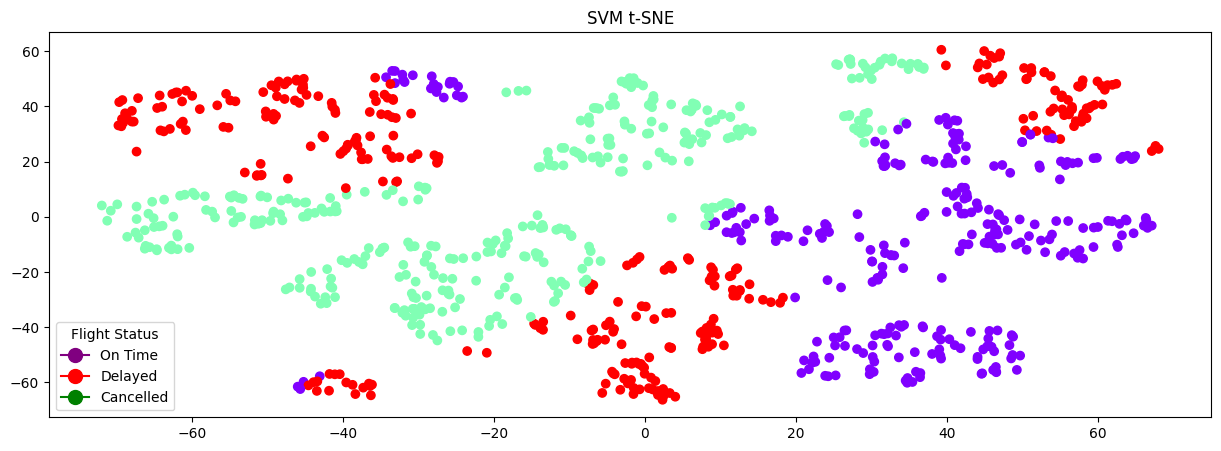

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Reducir la muestra al 5% para obtener menos puntos
sample_df = resample(df, replace=False, n_samples=int(0.05 * len(df)), random_state=42)

# Convertir las columnas categóricas a numéricas
label_encoders = {}
categorical_columns = ['Airport Name', 'Airport Country Code', 'Country Name', 'Airport Continent', 'Pilot Name', 'Flight Status']
for col in categorical_columns:
    le = LabelEncoder()
    sample_df[col] = le.fit_transform(sample_df[col])
    label_encoders[col] = le

# Seleccionar características y variable objetivo
features = ['Airport Name', 'Airport Country Code', 'Country Name', 'Airport Continent', 'Pilot Name']
X = sample_df[features].copy()

# Normalización de características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

y = sample_df['Flight Status']

# Reducción de dimensionalidad con t-SNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_scaled)

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X_tsne, y, test_size=0.2, random_state=42)

# Modelo de clasificación SVM
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train, y_train)  # Entrenar el modelo
svm_labels = svm_model.predict(X_test)  # Predecir las etiquetas

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, svm_labels)
report = classification_report(y_test, svm_labels)

# Visualización de SVM t-SNE
plt.figure(figsize=(15, 5))

plt.scatter(X_test[:, 0], X_test[:, 1], c=svm_labels, cmap='rainbow')
plt.title('SVM t-SNE')

# Mostrar leyenda con las categorías y colores
legend_labels = ['On Time', 'Delayed', 'Cancelled']
unique_colors = ['purple', 'red', 'green']
handles = [plt.Line2D([0], [0], marker='o', color=color, label=label, markerfacecolor=color, markersize=10) for label, color in zip(legend_labels, unique_colors)]
plt.legend(handles=handles, title='Flight Status')

# Imprimir métricas de rendimiento
print(f'SVM Accuracy: {accuracy:.2f}\n')
print(report)

plt.show()


In [ ]:
import random

# Definición del problema
# Definición del problema
# Queremos optimizar la programación de vuelos en un aeropuerto.
# Consideraremos que cada vuelo está representado por su hora de salida y llegada.


def generar_solucion_inicial(num_vuelos):
    solucion = []
    for _ in range(num_vuelos):
        fila = random.choice(data.index)
        hora_salida = int(data.loc[fila, 'Hora Salida'].split(":")[0])  # Convertir a entero
        hora_llegada = int(data.loc[fila, 'Hora Llegada'].split(":")[0])  # Convertir a entero
        solucion.append((hora_salida, hora_llegada))
    return solucion

def evaluar_solucion(solucion):
    # Calcular la diferencia total de tiempo entre la salida y la llegada de cada vuelo
    total_tiempo = sum(abs(salida - llegada) for salida, llegada in solucion)
    return -total_tiempo  # Minimizar el tiempo total, negativo para maximizar

def crossover(padre1, padre2):
    punto_corte = random.randint(1, len(padre1) - 1)  # Punto de corte aleatorio
    hijo1 = padre1[:punto_corte] + padre2[punto_corte:]
    hijo2 = padre2[:punto_corte] + padre1[punto_corte:]
    return hijo1, hijo2

def mutar(solucion, prob_mutacion):
    for i in range(len(solucion)):
        if random.random() < prob_mutacion:
            hora_salida = random.randint(0, 23)  # Nueva hora de salida aleatoria
            hora_llegada = hora_salida + random.randint(1, 8)  # Nueva hora de llegada aleatoria
            solucion[i] = (hora_salida, hora_llegada)
    return solucion

# Parámetros del algoritmo genético
num_individuos = 50
num_generaciones = 100
prob_crossover = 0.8
prob_mutacion = 0.1
num_vuelos = len(data)  # Número de vuelos en tu conjunto de datos

# Generar población inicial
poblacion = []
for _ in range(num_individuos):
    solucion = generar_solucion_inicial(num_vuelos)
    poblacion.append(solucion)

# Realizar el algoritmo genético
for generacion in range(num_generaciones):
    # Evaluar la calidad de cada individuo en la población
    evaluaciones = [evaluar_solucion(solucion) for solucion in poblacion]

    # Seleccionar los mejores individuos para el crossover
    mejores_indices = np.argsort(evaluaciones)[-int(num_individuos * prob_crossover):]
    padres = [poblacion[i] for i in mejores_indices]

    # Realizar el crossover para generar nuevos individuos hijos
    hijos = []
    while len(hijos) < num_individuos:
        padre1, padre2 = random.choices(padres, k=2)  # Selección aleatoria de padres
        hijo1, hijo2 = crossover(padre1, padre2)
        hijos.append(hijo1)
        hijos.append(hijo2)

    # Aplicar mutación a los individuos hijos
    hijos = [mutar(hijo, prob_mutacion) for hijo in hijos]

    # Reemplazar la población anterior con los nuevos individuos
    poblacion = hijos

# Obtener la mejor solución encontrada
mejor_solucion = max(poblacion, key=evaluar_solucion)

# Imprimir la mejor solución encontrada y su calidad
print("Mejores soluciones encontradas:", mejor_solucion)
calidad_mejor_solucion = evaluar_solucion(mejor_solucion)
print("Calidad de la mejor solución:", -calidad_mejor_solucion)


Mejor solución encontrada: [(13, 21), (18, 23), (0, 4), (22, 25), (15, 19), (20, 28), (19, 23), (16, 17), (17, 21), (7, 10), (15, 16), (3, 5), (20, 24), (1, 7), (22, 24), (21, 26), (14, 17), (12, 20), (11, 17), (10, 14), (4, 5), (7, 9), (17, 25), (8, 11), (8, 16), (23, 25), (1, 4), (23, 28), (4, 8), (10, 14), (4, 11), (16, 22), (1, 4), (4, 6), (8, 14), (0, 4), (14, 15), (8, 9), (21, 25), (9, 10), (16, 22), (8, 13), (23, 30), (22, 26), (21, 26), (14, 21), (1, 5), (21, 27), (3, 9), (11, 18), (22, 25), (23, 30), (23, 25), (19, 23), (4, 12), (21, 27), (16, 23), (17, 22), (21, 24), (22, 26), (6, 13), (0, 5), (23, 30), (23, 28), (6, 7), (16, 21), (8, 14), (3, 11), (3, 8), (20, 25), (21, 29), (1, 9), (12, 14), (13, 16), (21, 29), (19, 20), (16, 19), (10, 17), (11, 16), (16, 24), (7, 12), (3, 4), (16, 23), (16, 19), (4, 7), (0, 8), (23, 28), (16, 17), (23, 29), (21, 23), (6, 10), (9, 11), (21, 23), (7, 15), (19, 22), (1, 7), (7, 14), (19, 27), (22, 27), (6, 7), (19, 22), (7, 8), (1, 4), (16, 2

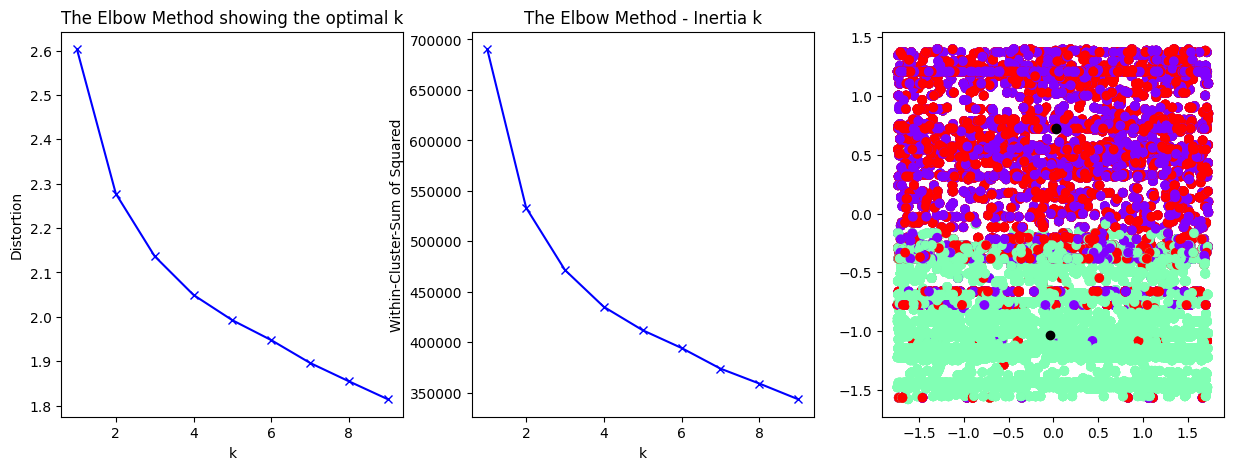

In [ ]:
# @ markdown **Elbow approach**
from scipy.spatial.distance import cdist

distortions = []
wss = []  # Within-Cluster-Sum of Squared
K = range(1, 10)

for k in K:
    kmeanModel = KMeans(n_clusters=k, n_init='auto').fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    wss.append(kmeanModel.inertia_)

# Visualizar resultados del método del "Elbow"
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')

plt.subplot(132)
plt.plot(K, wss, 'bx-')
plt.xlabel('k')
plt.ylabel('Within-Cluster-Sum of Squared')
plt.title('The Elbow Method - Inertia k')

plt.subplot(133)
# Seleccionar el valor óptimo de k (3 en este caso)
optimal_k = 3
kmeanModel = KMeans(n_clusters=optimal_k, n_init='auto').fit(X)
kmeanModel.fit(X)
plt.scatter(X[:, 0], X[:, 1], c=kmeanModel.labels_, cmap='rainbow')
plt.scatter(kmeanModel.cluster_centers_[:, 0], kmeanModel.cluster_centers_[:, 1], color='black')
plt.show()


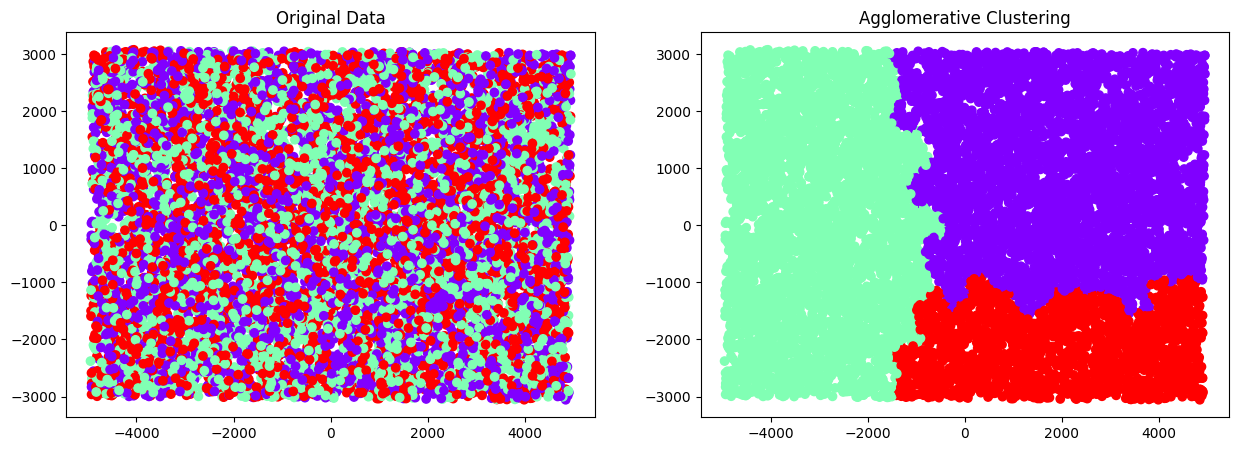

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

# Muestra aleatoria del 10% de los datos
sample_df = df.sample(frac=0.1, random_state=42)

# Convertir las columnas categóricas a numéricas
label_encoders = {}
categorical_columns = ['Airport Name', 'Airport Country Code', 'Country Name', 'Airport Continent', 'Pilot Name', 'Flight Status']
for col in categorical_columns:
    le = LabelEncoder()
    sample_df[col] = le.fit_transform(sample_df[col])
    label_encoders[col] = le

# Seleccionar características y variable objetivo
features = ['Airport Name', 'Airport Country Code', 'Country Name', 'Airport Continent', 'Pilot Name']
X = sample_df[features].copy()
y = sample_df['Flight Status']

# Reducción de dimensionalidad con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Modelo de clustering aglomerativo
clustering_model = AgglomerativeClustering(n_clusters=3, linkage="ward")
labels = clustering_model.fit_predict(X_pca)

# Visualización
plt.figure(figsize=(15, 5))

# Gráfico de dispersión original
plt.subplot(121)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='rainbow')
plt.title('Original Data')

# Gráfico de dispersión coloreado por las etiquetas de clustering
plt.subplot(122)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='rainbow')
plt.title('Agglomerative Clustering')

plt.show()

In [ ]:
svm_classifier = SVC(kernel='poly')
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)

print(f'SVM Classifier with Polynomial Kernel:\nAccuracy = {accuracy_svm:.2f}\n')
print(report_svm)
print('=' * 80)


SVM Classifier with Polynomial Kernel:
Accuracy = 0.66

              precision    recall  f1-score   support

           0       0.66      1.00      0.80     13069
           1       0.00      0.00      0.00      6655

    accuracy                           0.66     19724
   macro avg       0.33      0.50      0.40     19724
weighted avg       0.44      0.66      0.53     19724



Contar el número de Registros

In [ ]:
# Contar el número de registros
num_registros = len(df)

# Imprimir el resultado
print("Número de registros:", num_registros)

Número de registros: 98619


Overview of the data

In [ ]:
df.head(11)

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status,Hora Salida,Hora Llegada,Day_of_Week,Month
0,ABVWIg,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,2022-06-28,CXF,Edithe Leggis,On Time,08:14,12:58,1,6
1,jkXXAX,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,2022-12-26,YCO,Elwood Catt,On Time,20:29,02:26,0,12
2,CdUz2g,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,2022-01-18,GNB,Darby Felgate,On Time,06:05,10:01,1,1
3,BRS38V,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,2022-09-16,YND,Dominica Pyle,Delayed,10:24,01:27,4,9
4,9kvTLo,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2022-02-25,SEE,Bay Pencost,On Time,11:12,08:29,4,2
5,nMJKVh,Lora,Durbann,Female,55,Brazil,Coronel Horácio de Mattos Airport,BR,Brazil,SAM,South America,2022-06-10,LEC,Lora Durbann,On Time,04:46,17:32,4,6
6,8IPFPE,Rand,Bram,Male,73,Ivory Coast,Duxford Aerodrome,GB,United Kingdom,EU,Europe,2022-10-30,QFO,Rand Bram,Cancelled,22:38,14:31,6,10
7,pqixbY,Perceval,Dallosso,Male,36,Vietnam,Maestro Wilson Fonseca Airport,BR,Brazil,SAM,South America,2022-04-07,STM,Perceval Dallosso,Cancelled,00:40,03:34,3,4
8,QNAs2R,Aleda,Pigram,Female,35,Palestinian Territory,Venice Marco Polo Airport,IT,Italy,EU,Europe,2022-08-20,VCE,Aleda Pigram,On Time,07:19,06:10,5,8
9,3jmudz,Burlie,Schustl,Male,13,Thailand,Vermilion Airport,CA,Canada,NAM,North America,2022-04-06,YVG,Burlie Schustl,On Time,19:42,09:05,2,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98619 entries, 0 to 98618
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Passenger ID          98619 non-null  object        
 1   First Name            98619 non-null  object        
 2   Last Name             98619 non-null  object        
 3   Gender                98619 non-null  object        
 4   Age                   98619 non-null  int64         
 5   Nationality           98619 non-null  object        
 6   Airport Name          98619 non-null  object        
 7   Airport Country Code  98619 non-null  object        
 8   Country Name          98619 non-null  object        
 9   Airport Continent     98619 non-null  object        
 10  Continents            98619 non-null  object        
 11  Departure Date        98619 non-null  datetime64[ns]
 12  Arrival Airport       98619 non-null  object        
 13  Pilot Name      

Cantidad de valores únicos en cada columna

>



In [ ]:
df.nunique()


Passenger ID            98619
First Name               8437
Last Name               41658
Gender                      2
Age                        90
Nationality               240
Airport Name             9062
Airport Country Code      235
Country Name              235
Airport Continent           6
Continents                  6
Departure Date            364
Arrival Airport          9024
Pilot Name              98610
Flight Status               3
Hora Salida              1440
Hora Llegada             1440
Day_of_Week                 7
Month                      12
dtype: int64

Revisando la cantidad de valores nulos

In [ ]:
df.isnull().sum().sum() #Checking if Null value is present

0

Análisis exploratorio de **datos**

IndexError: ignored

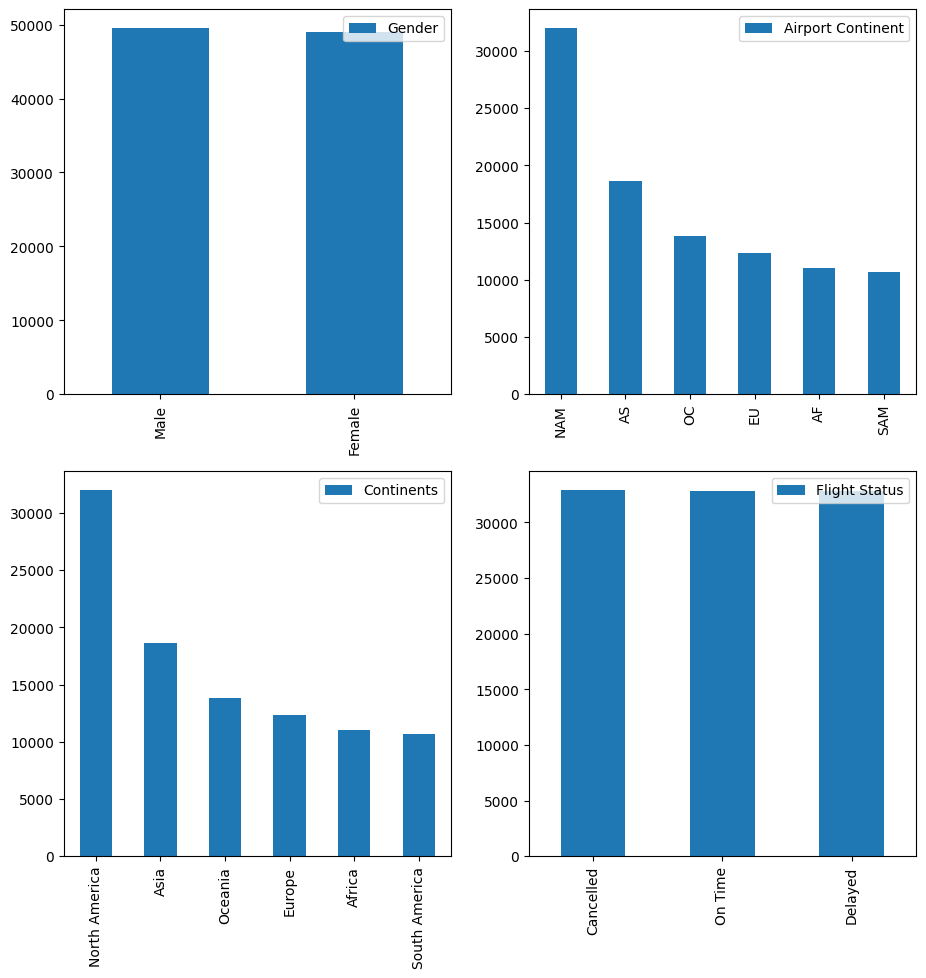

In [ ]:
_, ax = plt.subplots(figsize=(11, 11), ncols=2, nrows=2,  )
columns = [key for key, value in df.nunique().to_dict().items() if value < 10]
for index, column in enumerate(columns):
    df[column].value_counts().plot(ax=ax.ravel()[index] ,kind='bar', legend=True)


Nacionality

In [ ]:
nationality_count = df['Nationality'].value_counts().reset_index()
nationality_count.columns = ['Nationality', 'Count']

# Seleccionar los 20 países con más pasajeros
top_20_nationalities = nationality_count.head(20)

# Crear un gráfico de torta para la distribución de los 20 países principales
fig = px.pie(top_20_nationalities, names='Nationality', values='Count',
             title='Top 20 Nationalities with the Most Passengers')
fig.show()










Flight Status Ratio

In [ ]:
flight_status_count = df['Flight Status'].value_counts().reset_index()
flight_status_count.columns = ['Flight Status', 'Count']
fig_flight_status = px.pie(flight_status_count, values='Count', names='Flight Status', title='Flight Status Distribution')
fig_flight_status.show()

Random Forest

Decision Tree

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Cargar los datos
data_fraction = 0.3  # Ajusta la fracción según la capacidad de la memoria

# Preprocesamiento de datos
relevant_features = ["Arrival Airport", "Flight Status"]
df = df[relevant_features]

# Codificar variables categóricas usando Label Encoding
label_encoder = LabelEncoder()
df['Arrival Airport'] = label_encoder.fit_transform(df['Arrival Airport'])
df['Flight Status'] = label_encoder.fit_transform(df['Flight Status'])

# Mapear valores numéricos a etiquetas deseadas
label_map = {0: 'cancelado', 1: 'llegado a tiempo', 2: 'retrasado'}
df['Flight Status'] = df['Flight Status'].map(label_map)

# Separación de características y variable objetivo
X = df.drop('Flight Status', axis=1)
y = df['Flight Status']

# División de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creación y entrenamiento del modelo con Decision Tree Classifier
model = DecisionTreeClassifier(max_depth=5)  # Modifica la profundidad según sea necesario
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Generar informe con métricas
report = classification_report(y_test, y_pred)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)

# Imprimir el informe con métricas para cada clase y la precisión
print("Informe de clasificación:\n", report)
print("Precisión:", accuracy)

Informe de clasificación:
                   precision    recall  f1-score   support

       cancelado       0.33      0.98      0.49      6446
llegado a tiempo       0.35      0.01      0.02      6655
       retrasado       0.31      0.00      0.01      6623

        accuracy                           0.33     19724
       macro avg       0.33      0.33      0.17     19724
    weighted avg       0.33      0.33      0.17     19724

Precisión: 0.3269113770026364


In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['Passenger ID', 'First Name', 'Last Name', 'Gender', 'Nationality',
                        'Airport Name', 'Airport Country Code', 'Country Name',
                        'Airport Continent', 'Continents', 'Departure Date',
                        'Arrival Airport', 'Pilot Name', 'Flight Status']

label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

X = df.drop('Flight Status', axis=1)
y = df['Flight Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

svm_model = SVC(kernel='poly')
svm_model.fit(X_train, y_train)

predictions = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

X = df.drop('Flight Status', axis=1)
y = df['Flight Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)

predictions = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)

Accuracy: 0.332741837355506
Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.14      0.20      6681
           1       0.33      0.68      0.45      6524
           2       0.33      0.18      0.23      6519

    accuracy                           0.33     19724
   macro avg       0.34      0.33      0.29     19724
weighted avg       0.34      0.33      0.29     19724

Accuracy: 0.33096734942202394
Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.24      0.28      6681
           1       0.33      0.38      0.35      6524
           2       0.33      0.37      0.35      6519

    accuracy                           0.33     19724
   macro avg       0.33      0.33      0.33     19724
weighted avg       0.33      0.33      0.33     19724



Etiquetas de clasificación de Decision Tree:
[0 0 2 ... 1 1 0]


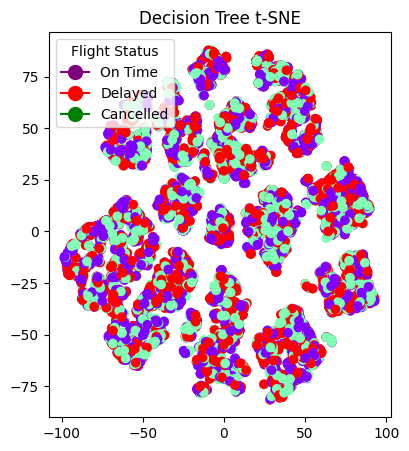

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier  # Cambiado a DecisionTreeClassifier
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

# Reducir la muestra al 5% para obtener menos puntos
sample_df = resample(df, replace=False, n_samples=int(0.1 * len(df)), random_state=42)

# Convertir las columnas categóricas a numéricas
label_encoders = {}
categorical_columns = ['Airport Name', 'Airport Country Code', 'Country Name', 'Airport Continent', 'Pilot Name', 'Flight Status']
for col in categorical_columns:
    le = LabelEncoder()
    sample_df[col] = le.fit_transform(sample_df[col])
    label_encoders[col] = le

# Seleccionar características y variable objetivo
features = ['Airport Name', 'Airport Country Code', 'Country Name', 'Airport Continent', 'Pilot Name']
X = sample_df[features].copy()

# Normalización de características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

y = sample_df['Flight Status']

# Reducción de dimensionalidad con t-SNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_scaled)

# Modelo de clasificación Árbol de Decisiones
dt = DecisionTreeClassifier()  # Cambiado a DecisionTreeClassifier
dt.fit(X_scaled, y)  # Entrenar el modelo con las características escaladas
dt_labels = dt.predict(X_scaled)  # Predecir las etiquetas con las características escaladas

# Visualización de Decision Tree t-SNE
plt.figure(figsize=(15, 5))

plt.subplot(132)
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=dt_labels, cmap='rainbow')
plt.title('Decision Tree t-SNE')

# Valores numéricos de las etiquetas de clasificación
print("Etiquetas de clasificación de Decision Tree:")
print(dt_labels)

# Mostrar leyenda con las categorías y colores
legend_labels = ['On Time', 'Delayed', 'Cancelled']
unique_colors = ['purple', 'red', 'green']
handles = [plt.Line2D([0], [0], marker='o', color=color, label=label, markerfacecolor=color, markersize=10) for label, color in zip(legend_labels, unique_colors)]
plt.legend(handles=handles, title='Flight Status')

plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


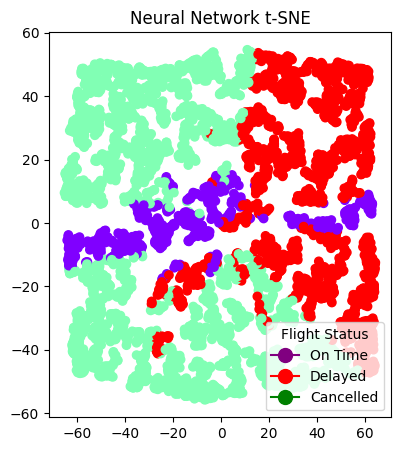

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils import resample
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.neural_network import MLPClassifier

def load_data(file_path):
    return pd.read_csv(file_path, sep=',')

def preprocess_data(data):
    # Reducir la muestra al 5% para obtener menos puntos
    sample_data = resample(data, replace=False, n_samples=int(0.05 * len(data)), random_state=42)

    # Convertir las columnas categóricas a numéricas
    label_encoders = {}
    categorical_columns = ['Airport Name', 'Airport Country Code', 'Country Name', 'Airport Continent', 'Pilot Name', 'Flight Status']
    for col in categorical_columns:
        le = LabelEncoder()
        sample_data[col] = le.fit_transform(sample_data[col])
        label_encoders[col] = le

    return sample_data

def visualize_neural_network(X, y):
    # Reducción de dimensionalidad con t-SNE
    tsne = TSNE(n_components=2)
    X_tsne = tsne.fit_transform(X)

    # Modelo de clasificación de red neuronal
    clf = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, activation='relu', solver='adam', random_state=42)
    clf.fit(X_tsne, y)  # Entrenar el modelo
    nn_labels = clf.predict(X_tsne)  # Predecir las etiquetas

    # Visualización de la red neuronal t-SNE
    plt.figure(figsize=(15, 5))

    plt.subplot(132)
    scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=nn_labels, cmap='rainbow')
    plt.title('Neural Network t-SNE')

    # Mostrar leyenda con las categorías y colores
    legend_labels = ['On Time', 'Delayed', 'Cancelled']
    unique_colors = ['purple', 'red', 'green']
    handles = [plt.Line2D([0], [0], marker='o', color=color, label=label, markerfacecolor=color, markersize=10) for label, color in zip(legend_labels, unique_colors)]
    plt.legend(handles=handles, title='Flight Status')

    plt.show()

if __name__ == "__main__":
    # Montar Google Drive
    drive.mount('/content/drive')

    # Ruta del archivo CSV en Google Drive
    csv_path = '/content/drive/My Drive/ProjectAirline/Airline_Dataset_Updated.csv'

    # Leer el conjunto de datos desde el archivo CSV
    data = load_data(csv_path)

    # Preprocesar los datos
    preprocessed_data = preprocess_data(data)

    # Seleccionar características y variable objetivo
    features = ['Airport Name', 'Airport Country Code', 'Country Name', 'Airport Continent', 'Pilot Name']
    X = preprocessed_data[features].copy()
    y = preprocessed_data['Flight Status']

    # Visualizar la red neuronal en t-SNE
    visualize_neural_network(X, y)
